In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# model to use
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.shape

(550068, 12)

### DATA EXPLORATION

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.9+ MB


In [6]:
# check for missing values
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
df_train['User_ID'].nunique()

5891

In [8]:
df_train['Product_ID'].nunique()

3631

In [9]:
df_train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
df_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [11]:
df_train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [12]:
df_train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [13]:
df_train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [14]:
df_train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [15]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Exploratory Data Analysis 

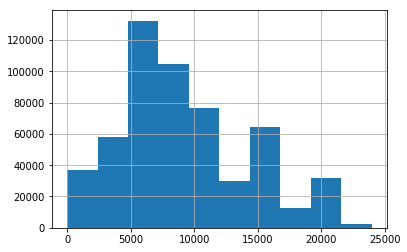

In [16]:
df_train['Purchase'].hist()

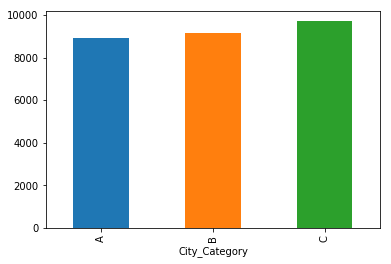

In [17]:
df_train.groupby('City_Category')['Purchase'].mean().plot(kind='bar')

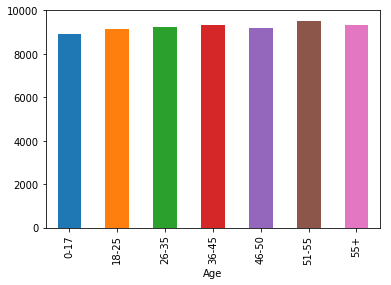

In [18]:
df_train.groupby('Age')['Purchase'].mean().plot(kind='bar')

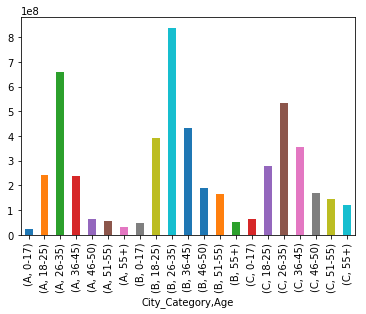

In [19]:
df_train.groupby(['City_Category', 'Age'])['Purchase'].sum().plot(kind='bar')

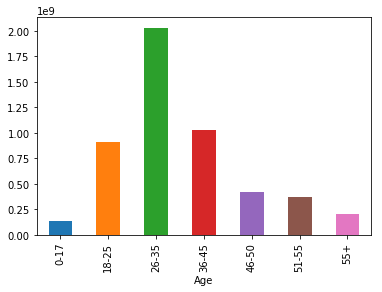

In [20]:
df_train.groupby('Age')['Purchase'].sum().plot(kind='bar')

### Using CrossTabs 

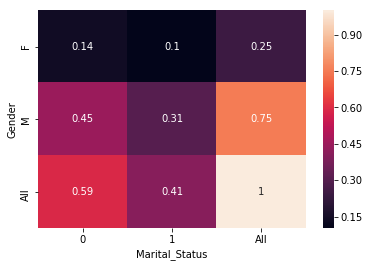

In [21]:
sns.heatmap(pd.crosstab(df_train['Gender'], df_train['Marital_Status'], margins=True, normalize=True), annot=True)

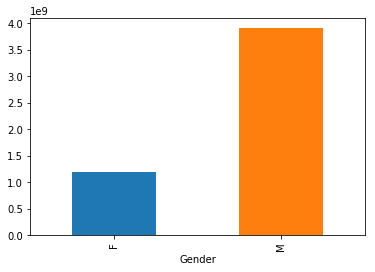

In [22]:
df_train.groupby('Gender')['Purchase'].sum().plot(kind='bar')

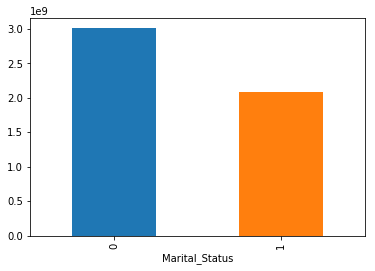

In [23]:
df_train.groupby('Marital_Status')['Purchase'].sum().plot(kind='bar')

### DATA PREPROCESSING 

In [24]:
# dropping the userID column
df_train.drop('User_ID', axis=1)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [25]:
# getting the total number of dtypes in the datatset
df_train.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [26]:
# displaying the columns of dtypes 'object'
df_train.dtypes[df_train.dtypes == 'object'].index

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [27]:
# converting the Gender column to dummies
df_train['Gender'] = pd.get_dummies(df_train['Gender'], drop_first=True)

In [28]:
# checking the Gender column
df_train['Gender'].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

In [29]:
# creating a dict for Age column for proper representation
age_cat = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}

# applying the age_cat to age column
df_train['Age'] = df_train['Age'].map(age_cat)

In [30]:
# checking the Age column
df_train['Age'].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

In [31]:
# making the 'City_Category' a dtype of 'category' using astype
df_train['City_Category'] = df_train['City_Category'].astype('category')

df_train['City_Category'] = df_train['City_Category'].cat.codes

In [32]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_train['Product_ID'] = lb.fit_transform(df_train['Product_ID'])

In [33]:
# making another dummy values for columns 'Stay_In_Current_City_Years'
df_train['Stay_In_Current_City_Years'] = pd.get_dummies(df_train['Stay_In_Current_City_Years'], drop_first=True)

### Dealing With Missing Values 

In [34]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [35]:
# Filling the missing values with the mean of the affected columns
df_train['Product_Category_2'] = df_train['Product_Category_2'].fillna(np.mean(df_train['Product_Category_2']))
df_train['Product_Category_3'] = df_train['Product_Category_3'].fillna(np.mean(df_train['Product_Category_3']))

In [36]:
# checking for any other missing values
df_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [37]:
df_train.dtypes.value_counts()

int64      6
uint8      2
float64    2
int32      1
int8       1
dtype: int64

Drawing the correlation of each colunm in the dataset

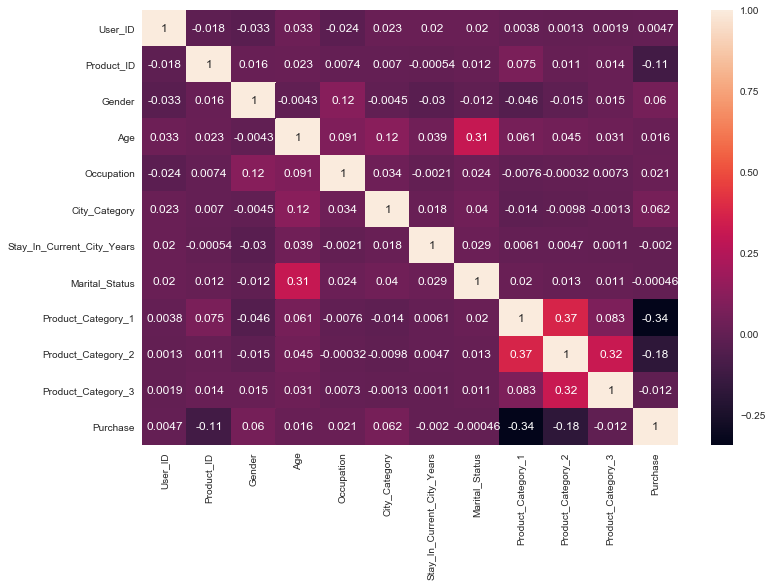

In [38]:
sns.set(rc={'figure.figsize': (12,8)})

sns.heatmap(df_train.corr(), annot=True)

### MODEL BUILDING 

In [39]:
X = df_train.drop(['Purchase', 'User_ID', 'Product_ID'], axis=1).values
y = df_train['Purchase'].values

X = X.reshape(-1, 9)
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 9)
(110014, 9)
(440054, 1)
(110014, 1)


In [40]:
%%time
# Initializing the Algorithms 
ranreg = RandomForestRegressor()
tree = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()

Wall time: 0 ns


USING RANDOMFORESTREGRESSOR

In [41]:
%%time
ranreg.fit(X_train, y_train)
y_pred_rand = ranreg.predict(X_test)

C:\Users\A.A.O\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Wall time: 2min 42s


In [42]:
from sklearn import metrics
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_rand))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_rand))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand)))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred_rand))

MSE:  9414469.708403045
MAE:  2236.8873220700425
RMSE:  3068.300785190892
Variance Score:  0.626696623801175


USING DECISIONTREEREGRESSOR


In [43]:
%%time
tree.fit(X_train, y_train)
y_pred_rand = tree.predict(X_test)

Wall time: 26.6 s


In [44]:
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_rand))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_rand))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand)))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred_rand))

MSE:  10460868.505041173
MAE:  2313.8964768248434
RMSE:  3234.3265922045
Variance Score:  0.5852042818401411


USING GradientDescentBoosting

In [45]:
%%time
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

C:\Users\A.A.O\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 8min 16s


In [46]:
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_gbr))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_gbr))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred_gbr))

MSE:  8888938.151968908
MAE:  2258.0196943931323
RMSE:  2981.4322316579505
Variance Score:  0.6475275710701489


### HYPER PARAMETER TUNING 

In [ ]:
%%time
from sklearn.grid_search import GridSearchCV
param_test1 = {'n_estimators':np.arange(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=123), 
param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, y_train)

C:\Users\A.A.O\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\A.A.O\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
%%time
y_pred_gbr = gsearch1.predict(X_test)

In [ ]:
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_gbr))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_gbr))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred_gbr))

In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
steps = [('scaler',StandardScaler()),
         ('forest', RandomForestRegressor(n_estimators=60, max_depth=150, min_samples_split=15, min_samples_leaf=10, n_jobs=5))]
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)
forest_scaled = pipeline.fit(X_train, y_train)

In [ ]:
y_pred_pipe = pipeline.predict(X_test)
accuracy = pipeline.score(X_test, y_test)
print("MSE: ", metrics.mean_squared_error(y_test, y_pred_pipe))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred_pipe))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_pipe)))
print("Variance Score: ", metrics.explained_variance_score(y_test, y_pred_pipe))
print("Accuracy Score: ", accuracy)

### PREPROCESSING THE TEST SET

In [ ]:
# converting the Gender column to dummies
df_test['Gender'] = pd.get_dummies(df_test['Gender'], drop_first=True)
# creating a dict for Age column for proper representation
age_cat = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}

# applying the age_cat to age column
df_test['Age'] = df_test['Age'].map(age_cat)
# making the 'City_Category' a dtype of 'category' using astype
df_test['City_Category'] = df_test['City_Category'].astype('category')

df_test['City_Category'] = df_test['City_Category'].cat.codes

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_test['Product_ID'] = lb.fit_transform(df_test['Product_ID'])
# making another dummy values for columns 'Stay_In_Current_City_Years'
df_test['Stay_In_Current_City_Years'] = pd.get_dummies(df_test['Stay_In_Current_City_Years'], drop_first=True)

# Filling the missing values with the mean of the affected columns
df_test['Product_Category_2'] = df_test['Product_Category_2'].fillna(np.mean(df_test['Product_Category_2']))
df_test['Product_Category_3'] = df_test['Product_Category_3'].fillna(np.mean(df_test['Product_Category_3']))

In [ ]:
# checking for any other missing values
df_test.isnull().sum()

In [ ]:
%%time
test_pred_gbr = gsearch1.predict(df_test)

In [ ]:
purchase = pd.DataFrame({'Purchase': test_pred_gbr}).to_csv('purchase.csv')